In [39]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn import tree

# Part 1: Choosing a classification model for our data

We use the Titanic dataset here from Lecture 2, as pre-processed in class. It has already been divided into training, testing, and validation sets. 

In [3]:
#Make sure the sets are uploaded in Google Colab
Titanic_train=pd.read_csv("Titanic_train_cleaned.csv")
Titanic_test=pd.read_csv("Titanic_test_cleaned.csv")
Titanic_validation=pd.read_csv("Titanic_val_cleaned.csv")

1. Run the code below. What is it doing?

In [4]:
ytrain=Titanic_train["Survived"]
Xtrain=Titanic_train.drop(columns="Survived")

In [5]:
yvalidation=Titanic_validation["Survived"]
Xvalidation=Titanic_validation.drop(columns="Survived")

In [6]:
ytest=Titanic_test["Survived"]
Xtest=Titanic_test.drop(columns="Survived")

2. Run the following code to fit a decision tree to the training data.

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 6)
classifier_DT.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_leaf_nodes=6)

3. Run the following code to plot the tree.

[Text(248.0, 380.52, 'Sex_male <= 0.5\ngini = 0.473\nsamples = 445\nvalue = [274, 171]\nclass = Died'),
 Text(124.0, 271.8, 'Pclass <= 2.5\ngini = 0.381\nsamples = 160\nvalue = [41, 119]\nclass = Survived'),
 Text(62.0, 163.07999999999998, 'gini = 0.084\nsamples = 91\nvalue = [4, 87]\nclass = Survived'),
 Text(186.0, 163.07999999999998, 'Age <= 6.5\ngini = 0.497\nsamples = 69\nvalue = [37, 32]\nclass = Died'),
 Text(124.0, 54.360000000000014, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = Survived'),
 Text(248.0, 54.360000000000014, 'gini = 0.48\nsamples = 60\nvalue = [36, 24]\nclass = Died'),
 Text(372.0, 271.8, 'Age <= 3.5\ngini = 0.298\nsamples = 285\nvalue = [233, 52]\nclass = Died'),
 Text(310.0, 163.07999999999998, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = Survived'),
 Text(434.0, 163.07999999999998, 'Pclass <= 1.5\ngini = 0.265\nsamples = 274\nvalue = [231, 43]\nclass = Died'),
 Text(372.0, 54.360000000000014, 'gini = 0.454\nsamples = 66\nvalue = [43, 23]\nclass 

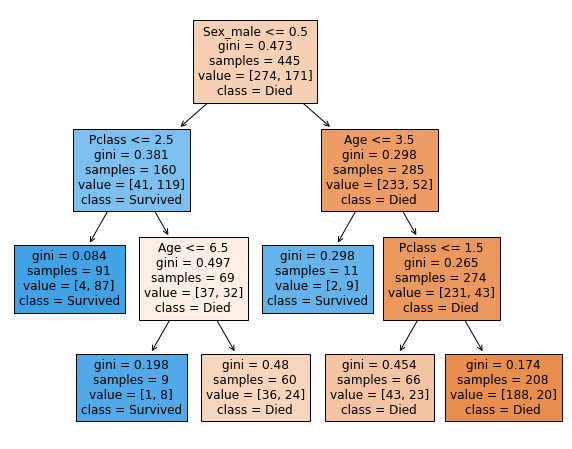

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(10,8)) #makes plot large

tree.plot_tree(classifier_DT,  class_names=("Died","Survived"), feature_names=Xtrain.columns, filled=True)


4. Run the two cells below to generate the plot seen in class. I expect you to know how to modify this code but not come up with it yourself.

In [14]:
n_max_leaf_nodes = range(2,60) # Lets train the models with 2, 3, 4, ... 60 leafs
array_train = []
array_val= []

for n in n_max_leaf_nodes:
    
    classifier_DT = DecisionTreeClassifier(max_leaf_nodes = n).fit(Xtrain, ytrain) #modify here if you change model
    
    y_pred_train = classifier_DT.predict_proba(Xtrain)[:,1]
    y_pred_val = classifier_DT.predict_proba(Xvalidation)[:,1]
    
    score_train=roc_auc_score(ytrain,y_pred_train)
    score_val=roc_auc_score(yvalidation,y_pred_val)

    array_train.append(score_train)
    array_val.append(score_val)

Text(0, 0.5, 'AUC')

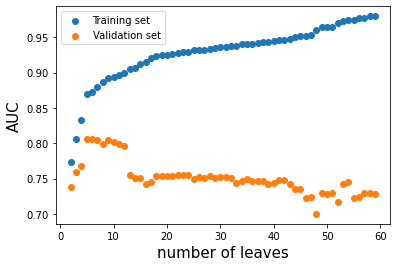

In [16]:
plt.scatter(n_max_leaf_nodes,array_train)
plt.scatter(n_max_leaf_nodes,array_val)


plt.legend(['Training set','Validation set'])
plt. xlabel("number of leaves",fontsize=15)
plt. ylabel("AUC",fontsize=15)

# Part 2: Wrapping up

1. Merge the training set and validation. How did we do this last lecture? 

In [18]:
Xtrain_val=pd.concat([Xtrain, Xvalidation])
ytrain_val=pd.concat([ytrain, yvalidation])

2. Retrain the final model `classifier_DT` on this merged set.

In [30]:
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 10)
classifier_DT.fit(Xtrain_val, ytrain_val)

DecisionTreeClassifier(max_leaf_nodes=10)

3. Use the code above to plot the tree. What seems to really contribute to surviving the Titanic?

[Text(248.0, 403.81714285714287, 'Sex_male <= 0.5\ngini = 0.475\nsamples = 668\nvalue = [408, 260]\nclass = Died'),
 Text(124.0, 341.69142857142856, 'Pclass <= 2.5\ngini = 0.388\nsamples = 239\nvalue = [63, 176]\nclass = Survived'),
 Text(62.0, 279.5657142857143, 'gini = 0.117\nsamples = 128\nvalue = [8, 120]\nclass = Survived'),
 Text(186.0, 279.5657142857143, 'Fare <= 23.7\ngini = 0.5\nsamples = 111\nvalue = [55, 56]\nclass = Survived'),
 Text(124.0, 217.44, 'Age <= 36.5\ngini = 0.482\nsamples = 89\nvalue = [36, 53]\nclass = Survived'),
 Text(62.0, 155.3142857142857, 'gini = 0.466\nsamples = 84\nvalue = [31, 53]\nclass = Survived'),
 Text(186.0, 155.3142857142857, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Died'),
 Text(248.0, 217.44, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]\nclass = Died'),
 Text(372.0, 341.69142857142856, 'Age <= 3.5\ngini = 0.315\nsamples = 429\nvalue = [345, 84]\nclass = Died'),
 Text(310.0, 279.5657142857143, 'gini = 0.337\nsamples = 14\nvalue = [3, 1

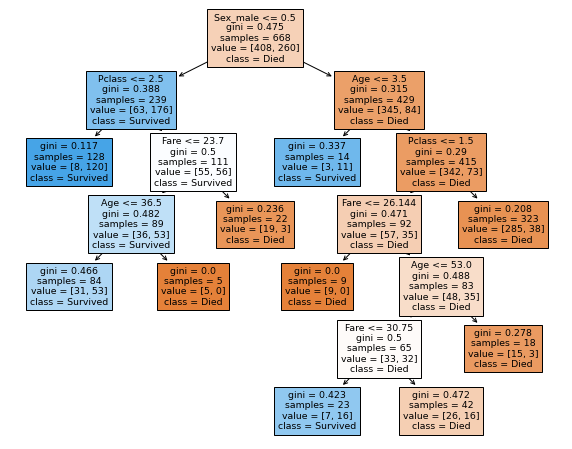

In [31]:
from matplotlib.pyplot import figure
figure(figsize=(10,8)) #makes plot large

tree.plot_tree(classifier_DT,  class_names=("Died","Survived"), feature_names=Xtrain.columns, filled=True)

4. Run the code below. Are the "important features" the one you could infer from the tree?

In [33]:
classifier_DT.feature_importances_

array([0.21174063, 0.11066769, 0.08730343, 0.        , 0.59028825,
       0.        , 0.        ])

In [37]:
Xtrain

,Pclass,Age,Fare,Family_Presence,Sex_male,Embarked_Q,Embarked_S
0,3,1.000000,11.1333,1,0,0,1
1,2,41.000000,19.5000,1,0,0,1
2,3,17.000000,8.6625,0,1,0,1
3,2,42.000000,26.0000,1,0,0,1
4,3,30.378347,23.2500,1,0,1,0
...,...,...,...,...,...,...,...
440,2,42.000000,27.0000,1,1,0,1
441,1,38.000000,80.0000,0,0,0,1
442,1,33.000000,53.1000,1,0,0,1
443,2,30.378347,13.8625,0,1,0,0


5. Run the code below. What would have happened to Jack and Rose based on the model you built?

In [36]:
Titanic_movie=pd.read_csv("Titanic_movie.csv")
Titanic_movie

,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Jack Dawson,male,23,0,0,NaN,13,G60,S
1,1,Rose DeWitt Bukater,female,17,0,1,NaN,247,B52 B54 B56,S


6. Obtain the predicted classes on the test set. Deduce the accuracy on the test set and the confusion matrix.

In [41]:
y_pred = classifier_DT.predict(Xtest)

print(confusion_matrix(ytest,y_pred))
print(accuracy_score(ytest,y_pred))

[[123  18]
 [ 22  60]]
0.820627802690583
